# 문서 유사도
- 두 문서가 내용적으로 얼마나 비슷한지를 수치로 나타낸다.
- 보통 문서를 벡터(TF-IDF)로 변환한 후, 벡터 간 거리/각도를 계산해서 유사도를 구한다.

In [3]:
import os, glob
import pandas as pd

path = './data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)

    # 파일명
    filename = os.path.basename(file_)
    filenam = filename.split('.')[0]
    filename_list.append(filename)

    # 의견
    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions)

document_df = pd.DataFrame(
    {
        'filename': filename_list,
        'opinions': opinions_list
    }
)
document_df

,filename,opinions
0,battery-life_ipod_nano_8gb.txt.data,...
1,gas_mileage_toyota_camry_2007.txt.data,...
2,room_holiday_inn_london.txt.data,...
3,location_holiday_inn_london.txt.data,...
4,staff_bestwestern_hotel_sfo.txt.data,...
5,voice_garmin_nuvi_255W_gps.txt.data,...
6,speed_garmin_nuvi_255W_gps.txt.data,...
7,size_asus_netbook_1005ha.txt.data,...
8,screen_garmin_nuvi_255W_gps.txt.data,...
9,battery-life_amazon_kindle.txt.data,...


In [4]:
# 표제어 추출 전처리 함수
import string
import nltk
from nltk.stem import WordNetLemmatizer # 표제어 추출기

def lemmatize(text):
    text = text.lower()

    # 특수문자 제거
    punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation) # 특수문자 부호 유니코드를 None으로 규칙 생성
    text = text.translate(punc_rem_dict)                               # 문장부호 삭제 적용

    # 토큰화
    tokens = nltk.word_tokenize(text) # 단어단위로 text 분리

    # 어근분리
    lemmatizer = WordNetLemmatizer()

    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

In [7]:
# Lemmatize 적용 TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words = 'english',
    ngram_range = (1, 2),
    max_df = 0.85,  # 상위 85%로 너무 자주 등장한 특성 제외
    min_df= 0.05    # 하위 5%로 너무 희귀하게 등장한 특성 제외
)

opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])
opinions_vecs.toarray()

/opt/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:411: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00431381, ..., 0.        , 0.        ,
        0.00301144],
       ...,
       [0.        , 0.        , 0.        , ..., 0.06489916, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02087523, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00958919, ..., 0.        , 0.01338829,
        0.        ]], shape=(51, 4072))

In [8]:
# KMeans 문서 군집화
from sklearn.cluster import KMeans # KMeans 군집화 모델

kmeans = KMeans(
    n_clusters = 4,   # 군집(클러스터) 개수
    max_iter = 5000,  # 최대 반복 횟수
    random_state = 0  # 재현성
)

document_df['cluster'] = kmeans.fit_predict(opinions_vecs) # TF-IDF 기반 군집 라벨 추ㅠ가
document_df 

,filename,opinions,cluster
0,battery-life_ipod_nano_8gb.txt.data,...,1
1,gas_mileage_toyota_camry_2007.txt.data,...,2
2,room_holiday_inn_london.txt.data,...,3
3,location_holiday_inn_london.txt.data,...,0
4,staff_bestwestern_hotel_sfo.txt.data,...,3
5,voice_garmin_nuvi_255W_gps.txt.data,...,1
6,speed_garmin_nuvi_255W_gps.txt.data,...,1
7,size_asus_netbook_1005ha.txt.data,...,1
8,screen_garmin_nuvi_255W_gps.txt.data,...,1
9,battery-life_amazon_kindle.txt.data,...,1


In [ ]:
# 호텔 관련 리뷰를 기준 리뷰로 설정
hotel_idx = document_df[document_df['cluster'] == 1].index
print(hotel_idx.shape)
print(hotel_idx)

(24,)
Index([ 0,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 19, 21, 24, 25, 26, 33, 34,
       36, 37, 38, 40, 44, 48],
      dtype='int64')


In [10]:
# 첫번째 리뷰를 기준 리뷰로 설정
document_df.iloc[1]


filename               gas_mileage_toyota_camry_2007.txt.data
opinions                                                  ...
cluster                                                     2
Name: 1, dtype: object

In [ ]:
# 모든 리뷰에 대한 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

opinions_sim = cosine_similarity(opinions_vecs[1], opinions_vecs) # 기준 리뷰 1개와 전체 리뷰 유사도 계산
opinions_sim

array([[0.00617745, 1.        , 0.01655907, 0.01094342, 0.00602421,
        0.01268762, 0.01163344, 0.01691668, 0.01333093, 0.00828446,
        0.00915797, 0.00838257, 0.00877177, 0.0144262 , 0.00565291,
        0.03233774, 0.0130667 , 0.00642447, 0.16274038, 0.00774328,
        0.00554933, 0.01166003, 0.0865878 , 0.08341825, 0.01302325,
        0.01027204, 0.00679485, 0.01576924, 0.01526339, 0.07042111,
        0.01446425, 0.00753869, 0.00888814, 0.02055643, 0.01660099,
        0.96371689, 0.00764481, 0.00920648, 0.00804405, 0.0116149 ,
        0.01124696, 0.01739415, 0.14560356, 0.27442494, 0.00533985,
        0.05542298, 0.01603456, 0.20396172, 0.01103352, 0.00492599,
        0.02225328]])

In [ ]:
# 유사도 기준 높은순으로 정렬
opinions_sorted_idx = opinions_sim.argsort()[:, ::-1]  # 유사도 큰 순서로 인덱스 정렬 (내림차순)
opinions_sorted_idx = opinions_sorted_idx[:, 1:]       # 자기자신 (유사도 1.0) 인덱스 제외
opinions_sorted_idx = opinions_sorted_idx.reshape(-1)  # 인덱스 배열을 1차원으로 변환

# 유사도가 높은순으로 정렬된 파일명을 조회
result_df = document_df.iloc[opinions_sorted_idx][['filename', 'cluster']] # 정렬된 순서대로 파일명, 클러스터 추출
opinions_sim = opinions_sim.reshape(-1)                                    # 유사도 배열을 1차원으로 변환
result_df['similarity'] = opinions_sim[opinions_sorted_idx]                # 정렬된 인덱스에 맞춰 유사도 컬럼 추가
result_df

,filename,cluster,similarity
35,mileage_honda_accord_2008.txt.data,2,0.963717
43,comfort_toyota_camry_2007.txt.data,2,0.274425
47,performance_honda_accord_2008.txt.data,2,0.203962
18,comfort_honda_accord_2008.txt.data,2,0.162740
42,quality_toyota_camry_2007.txt.data,2,0.145604
22,interior_toyota_camry_2007.txt.data,2,0.086588
23,transmission_toyota_camry_2007.txt.data,2,0.083418
29,seats_honda_accord_2008.txt.data,2,0.070421
45,interior_honda_accord_2008.txt.data,2,0.055423
15,performance_netbook_1005ha.txt.data,1,0.032338


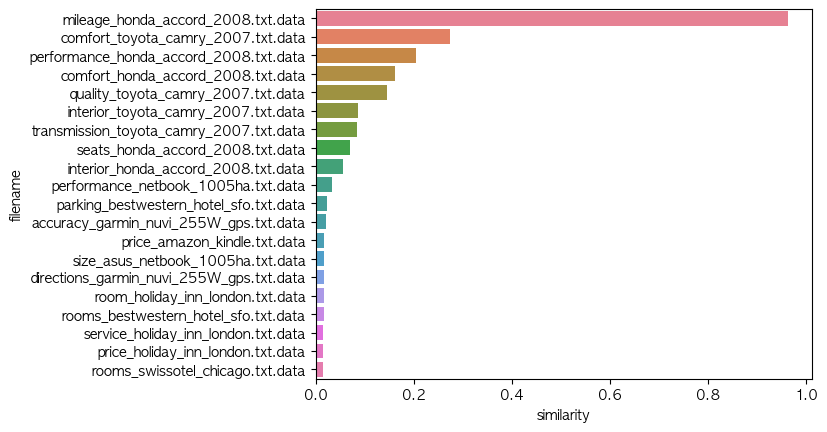

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x='similarity',     # x축은 유사도 값
    y = 'filename',     # y축은 파일명
    data = result_df.iloc[:20], # 유사도 상위 20%
    hue = 'filename'    # 색상 : 파일명으로 구분
)
plt.show()